In [ ]:
!pip install gensim nltk

In [ ]:
!pip install pymorphy2 pymorphy2-dicts-ru

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 43.1 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=292cfbfc7f40a6ecc2942d5f2831e08058ab68aecd3e3bb6973aa65ea76e55c2
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer # Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer #  TfidfVectorizer
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.manifold import TSNE
import threading, time
from multiprocessing import Process
import statistics

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
import pymorphy2
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


Загрузка нужных библиотек

In [ ]:
recipe = pd.read_csv('/content/cookbook.csv')

In [ ]:
recipe.columns #название колонок

Index(['Unnamed: 0', 'calories', 'carbohydrates', 'category', 'complexity',
       'date', 'fats', 'ingredients', 'number_of_servings', 'proteins',
       'proteins fats carbohydrates', 'rating', 'tags', 'text', 'time',
       'title'],
      dtype='object')

In [ ]:
recipe.head()

,Unnamed: 0,calories,carbohydrates,category,complexity,date,fats,ingredients,number_of_servings,proteins,proteins fats carbohydrates,rating,tags,text,time,title
0,0,585.02,34.09,Пицца,легко,2023-09-11,36.17,"['основа для пиццы – 1 шт.', 'томатный соус – ...",2,30.61,30.61 г/36.17 г/34.09,5.0,"['Основное блюдо', 'Вегетарианство']","Если вы любите пиццу Пепперони, то вам обязате...",30,Пицца Мясное ассорти
1,1,0.00,NaN,Салат Цезарь,средне,2020-11-18,NaN,"['капуста цветная 1 кг', 'яйцо куриное - 2 шт....",4,NaN,NaN,0.0,"['Основное блюдо', 'Вегетарианство: Ово-лакто'...","Котлеты из цветной капусты, которые так понрав...",0,Котлеты из цветной капусты
2,2,459.22,30.20,Блюда с картошкой,легко,2015-02-16,30.66,"['1 кг картофеля для пюре', '250–300 г тонких ...",4,15.38,15.38 г/30.66 г/30.20,5.0,"['Жарение', 'Обед', 'Ужин', 'Основное блюдо', ...","Шаг 1\n\n\nОчистите картофель, разрежьте кажду...",45,Картофельное пюре с чесноком и беконом
3,3,266.92,NaN,Блюда с картошкой,средне,2017-12-11,NaN,"['мука пшеничная 600 г', 'дрожжи быстродейству...",15,NaN,1 ч,5.0,"['Хлебопечка', 'Выпекание', 'Жарение', 'Выпечк...","Румяные, мягкие домашние пирожки с картофелем ...",135,Пирожки с картофелем и луком
4,4,0.00,NaN,Блины и блинчики,легко,2011-09-30,NaN,"['семга слабосоленая – 150 г', 'сметана – 175-...",1,NaN,NaN,0.0,"['Основное блюдо', 'Вегетарианство']","Шаг 1Взбить миксером яйца с сахаром, солью и м...",0,Блины закусочные Традиционные


In [ ]:
Z = recipe['text'].dropna()


TfidfVectorizer

In [ ]:
count_vectorizer = CountVectorizer()
count_vec = count_vectorizer.fit_transform(Z)
count_vec.shape

(10504, 50829)

In [ ]:
km = KMeans(n_clusters=30, n_init = 1, init='k-means++', random_state=50)
km.fit(count_vec)

KMeans(n_clusters=30, n_init=1, random_state=50)

In [ ]:
km.inertia_

1944888.826635248

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vec = tfidf_vectorizer.fit_transform(Z)
tfidf_vec.shape

(10504, 50829)

In [ ]:
km_tfidf = KMeans(n_clusters=40, n_init = 1, init='k-means++', random_state=50)
km_tfidf.fit(tfidf_vec)

KMeans(n_clusters=40, n_init=1, random_state=50)

In [ ]:
km_tfidf.inertia_

9123.45898266585

In [ ]:
metrics = []
points = list(range(5, 50, 1))

neighbors = np.array(points)

for i in points:
    km_tfidf = KMeans(n_clusters=i, n_init = 1, init='k-means++', random_state=42)
    km_tfidf.fit(tfidf_vec)

    metrics.append(km_tfidf.inertia_)

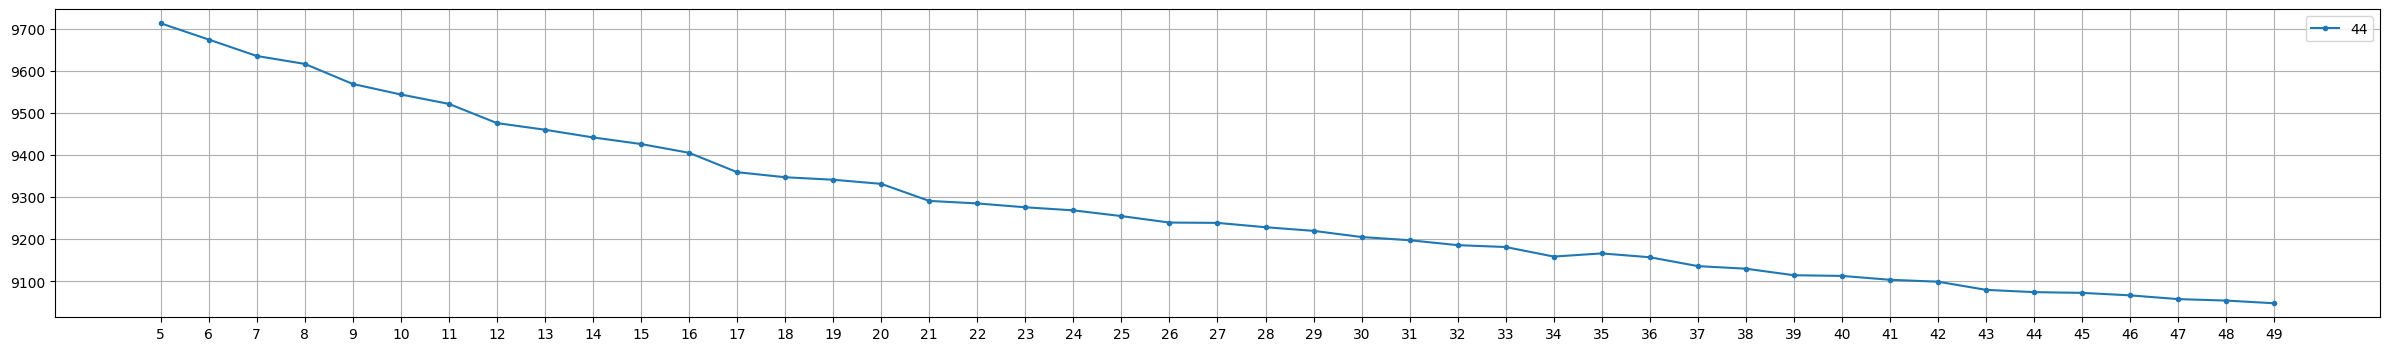

In [ ]:
fig = plt.figure(figsize=(30, 4))
ax = fig.add_subplot()
ax.plot(neighbors, metrics, marker='.', label = str(i))


ax.xaxis.set_major_locator(ticker.FixedLocator(neighbors))
ax.legend()
ax.grid()

Doc2Vec

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
morph = pymorphy2.MorphAnalyzer(lang='ru')
stop_words = set(stopwords.words('russian'))

x_iter = 0

def preprocess(text):
    global x_iter

    x_iter+= 1

    if x_iter % 1000 == 0:
        print(x_iter)
    else:
        print(x_iter, end =',')


    text = text.lower()


    symbols = re.findall("[A-Za-zА-Яа-яЁё\s]", text)
    text = ''.join(symbols)


    text = [morph.parse(word)[0].normal_form for word in text.split(' ')]
    text = ' '.join(text)

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


Функция preprocess выполняет несколько шагов для предварительной обработки текста:

Преобразует текст в нижний регистр.
Извлекает только символы алфавита и пробелов с помощью регулярного выражения.
Разбивает текст на слова, нормализует каждое слово до его базовой формы с использованием библиотеки pymorphy2.
Удаляет стоп-слова из списка stop_words.
Возвращает преобразованный текст без стоп-слов.

In [ ]:
text = Z.apply(preprocess)

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

In [ ]:
text.to_csv('full_clean_text.csv')

In [ ]:
x_iter = 0

In [ ]:
parts = 5
l = len(Z)//parts
data = []
amount = 0

for i in range(parts):
    if i + 1 == parts:
        data.append(Z[i*l:-1])
    else:
        data.append(Z[i*l:(i+1)*l])

    print(len(data[i]), i*l, (i+1)*l)
    amount+=len(data[i])

print('Amount:', amount)

2100 0 2100
2100 2100 4200
2100 4200 6300
2100 6300 8400
2103 8400 10500
Amount: 10503


In [ ]:
thread_list = []

def worker(i, data):
    text = data.apply(preprocess)
    text.to_csv(f'clean_text_{i}.csv')

start_time = time.time()

for i in range(5):
    thread_list.append(Process(target=worker, args=(i, data[i])))
    thread_list[i].start()

for i in range(5):
    thread_list[i].join()


end_time = time.time()
print(f'Elapsed time: {end_time-start_time}')

11,,1,1,1,2,2,3,2,2,3,3,3,4,24,,44,,5,5,3,5,5,6,6,6,6,7,4,7,7,8,8,97,,8,9,8,5,10,6,109,,10,9,11,10,1111,7,,12,12,8,13,13,11,12,9,13,14,10,1411,,12,12,13,15,1513,,14,16,14,16,17,1517,,15,18,16,14,18,16,19,1915,,20,17,16,21,17,18,18,17,19,22,20,20,18,19,23,21,20,1922,,2321,21,,2024,,24,22,25,2123,,22,22,26,2723,,28,24,24,23,25,26,27,29,28,25,24,29,26,25,25,30,27,30,31,26,26,27,27,28,2831,,32,29,29,33,32,28,30,33,31,30,29,34,32,34,35,30,33,3135,,34,35,36,36,36,31,37,37,3738,,3238,,39,33,32,40,38,33,39,40,3441,,4239,34,,41,35,40,35,36,4243,,4136,,44,43,45,46,42,4437,,47,38,43,48,39,45,49,50,37,51,4446,,40,52,45,47,4641,,425347,,,43,48,54,4844,,49,55,45,50,51,49,46,50,47,52,51,5648,,53,52,57,54,58,53,49,59,54,55,6050,,55,56,56,57,57,58,6159,,51,6258,,52,60,63,59,64,60,61,53,54,61,62,62,65,55,63,63,6466,,64,67,65,65,68,66,56,66,57,69,67,67,68,68,58,693870,,,69,5939,,71,70,71,40,60,72,70,72,41,71,72,42,73,43,73,61,74,75,74,73,62,63,44,74,45,64,7575,,46,76,76,65,77,6676,,7778,,77,79,47,6778,,4

Этот код использует библиотеку threading для параллельного выполнения функции worker. Давайте разберем его шаг за шагом:

Создается список процессов (thread_list) для управления пятью процессами.
Каждый процесс получает индекс i и данные data[i].
Функция worker принимает два аргумента: i (индекс данных) и data[i] (данные для обработки).
Внутри функции происходит обработка текста и сохранение его в файл clean_text_{i}.csv.
Для каждого процесса запускается метод start(), чтобы начать выполнение.
После этого вызывается метод join() для каждого процесса, чтобы дождаться завершения всех процессов перед продолжением работы программы.
В конце программа выводит время выполнения.

In [ ]:

data = []

for i in range(parts):
    data.append(pd.read_csv(f'clean_text_{i}.csv', index_col=0))

df = pd.concat(data)
df.shape

(10503, 1)

In [ ]:
df.to_csv('full_clean_text_1.csv')

Модель Doc2Vec

In [ ]:

length = [len(i) for i in text]
print('Average:', sum(length)/len(text))
print('Median:', statistics.median(length))

Average: 1066.3751904036558
Median: 855.0


In [ ]:
data = [TaggedDocument(words = word_tokenize(doc), tags=[str(i)]) for i, doc in enumerate(text)]


In [ ]:
# Doc2vec модель обучается
model = Doc2Vec(vector_size=100, min_count=10, epochs=50,  window=3)
model.build_vocab(data)
model.train(data, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
model.save('doc2vec.model')

In [ ]:
model.dv.most_similar('0')

[('749', 0.5907964110374451),
 ('2253', 0.5726956725120544),
 ('4179', 0.5723205804824829),
 ('1544', 0.568177342414856),
 ('1299', 0.5566763877868652),
 ('5101', 0.5261757969856262),
 ('7191', 0.524421215057373),
 ('5499', 0.5234435200691223),
 ('9598', 0.5204716920852661),
 ('6211', 0.5159322619438171)]

In [ ]:
document_vectors = [model.infer_vector( word_tokenize(doc)) for doc in text]


In [ ]:
kmeans_d2v = KMeans(n_clusters=20, n_init = 1, init='k-means++', random_state=42)
kmeans_d2v.fit(document_vectors)

KMeans(n_clusters=20, n_init=1, random_state=42)

In [ ]:
def metrics_text(model, x):
    print(f"Сумма квадратов расстояний до ближайшего центра: {model.inertia_}")

    silhouette = silhouette_score(x, model.labels_)
    db_index = davies_bouldin_score(x, model.labels_)
    ch_index = calinski_harabasz_score(x, model.labels_)

    print(f"Silhouette Score: {silhouette:.2f}")
    print(f"Davies-Bouldin Index: {db_index:.2f}")
    print(f"Calinski-Harabasz Index: {ch_index:.2f}")

def metrics_json(model, x):
    return {
        'error': model.inertia_,
        'silhouette': silhouette_score(x, model.labels_),
        'db_index': davies_bouldin_score(x, model.labels_),
        'ch_index': calinski_harabasz_score(x, model.labels_)
    }

Эта функция metrics_json возвращает словарь с метриками для кластеризации данных. Метрики включают:

Inertia (или сумма квадратов расстояний до ближайшего центра) – это мера компактности кластеров, которую можно интерпретировать как степень разброса точек внутри каждого кластера относительно их центров.
Silhouette Score – это показатель качества кластеризации, который оценивает близость каждой точки к своему кластеру и удаленность от других кластеров. Значение от -1 до 1, где 1 означает отличную кластеризацию.
Davies-Bouldin Index – это еще одна мера качества кластеризации, которая также оценивает компактность и отделённость кластеров друг от друга. Чем меньше индекс, тем лучше кластеризация.
Calinski-Harabasz Index – аналогично предыдущим показателям, оценивает качество кластеризации. Высокое значение указывает на хорошую кластеризацию.
Этот набор метрик позволяет оценить различные аспекты кластеризации и выбрать наиболее подходящую модель для конкретных задач.




In [ ]:
metrics_text(kmeans_d2v, document_vectors)

Сумма квадратов расстояний до ближайшего центра: 695304.40574475
Silhouette Score: -0.01
Davies-Bouldin Index: 4.53
Calinski-Harabasz Index: 86.15


In [ ]:
metrics = { 'error': [],'silhouette':[], 'db_index': [], 'ch_index': []}
points = list(range(5, 100, 1))

neighbors = np.array(points)

for i in points:
    kmeans_d2v = KMeans(n_clusters=i, n_init = 1, init='k-means++', random_state=42)
    kmeans_d2v.fit(document_vectors)

    m = metrics_json(kmeans_d2v, document_vectors)

    for i in metrics.keys():
        metrics[i].append(m[i])

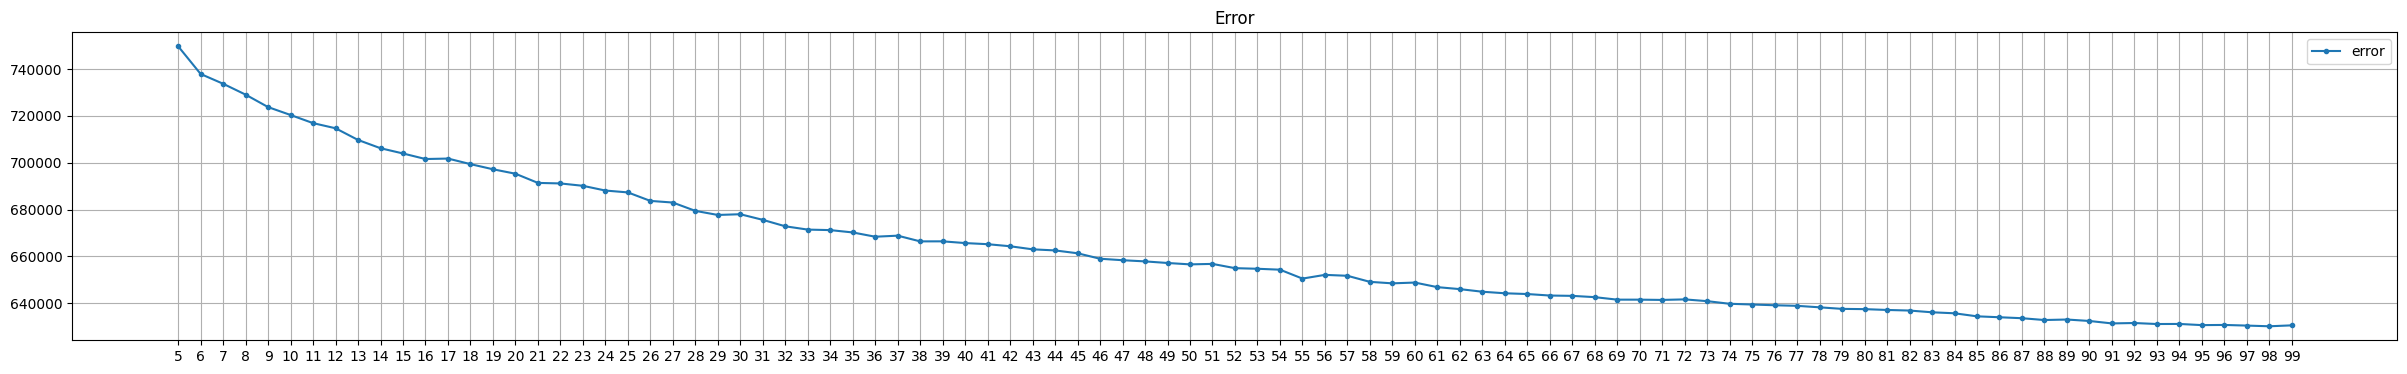

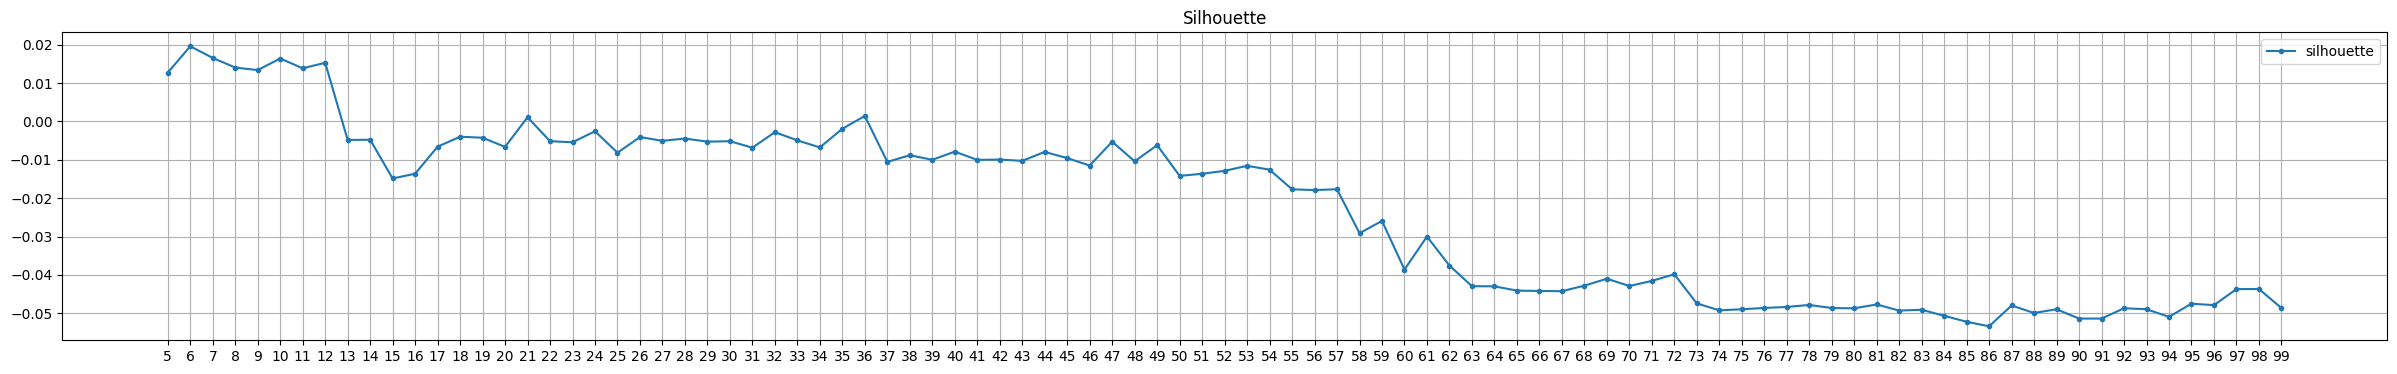

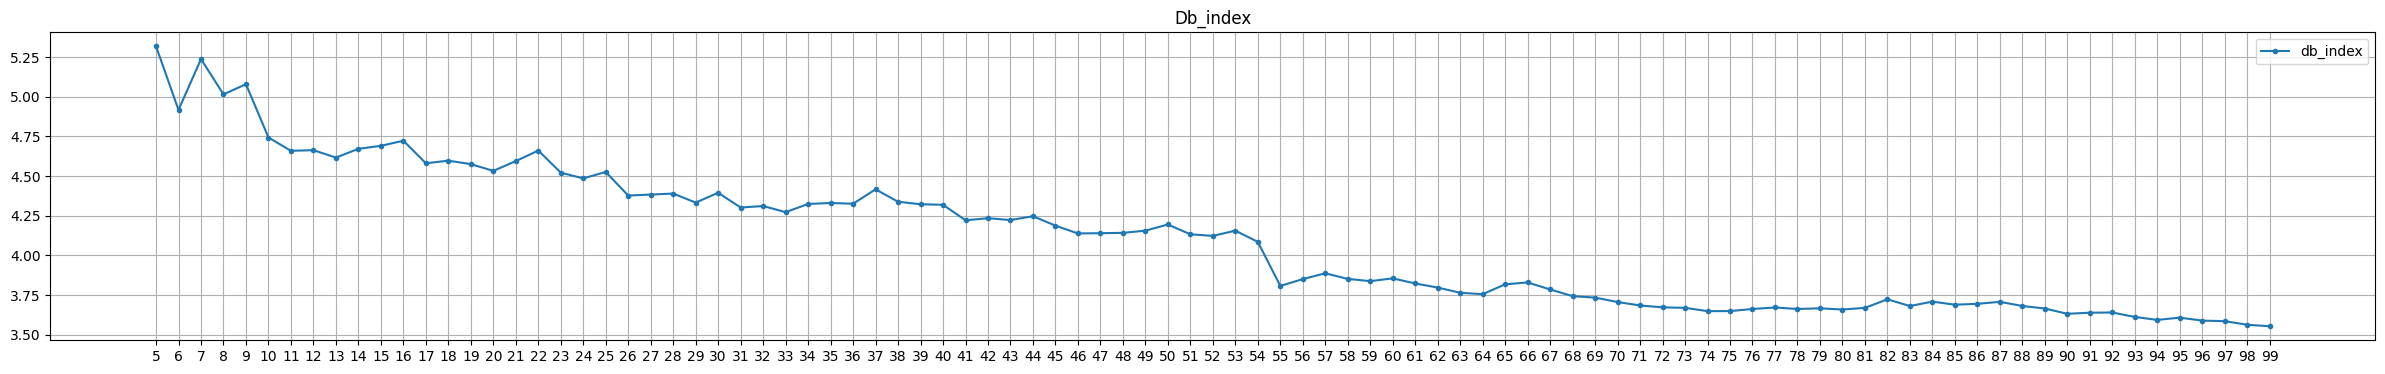

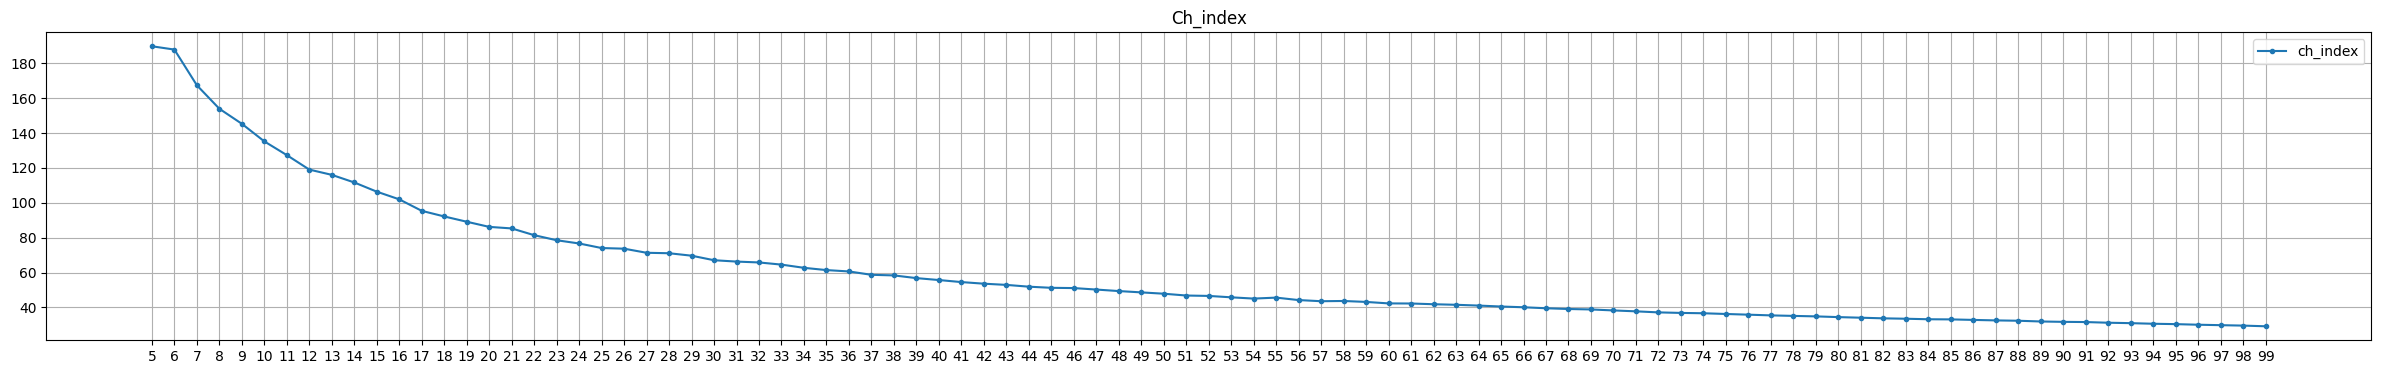

In [ ]:
for i in metrics.keys():
    fig = plt.figure(figsize=(30, 4))
    ax = fig.add_subplot()
    ax.plot(neighbors, metrics[i], marker='.', label = str(i))

    ax.set_title(i.capitalize())
    ax.xaxis.set_major_locator(ticker.FixedLocator(neighbors))
    ax.legend()
    ax.grid()

Word2Vec

In [ ]:
df = pd.read_csv('full_clean_text.csv', index_col=0)

In [ ]:
texts = [df.text.iloc[i].split() for i in range(len(df))]

In [ ]:
model = Word2Vec(texts, window=5, min_count=5, workers=5)
model.save("word2v.model")


In [ ]:
model.wv.most_similar("пюре")

[('толкушка', 0.6594719290733337),
 ('отвар', 0.6011691689491272),
 ('толкушкой', 0.5867676138877869),
 ('масса', 0.5683054327964783),
 ('кашицу', 0.5636630654335022),
 ('суппюре', 0.5447077751159668),
 ('пюрировать', 0.5143338441848755),
 ('блендером', 0.5068991184234619),
 ('сливки', 0.5050104856491089),
 ('пестик', 0.49839457869529724)]

In [ ]:
model.wv.doesnt_match("пестик суппюре масса пестик".split())

'суппюре'

In [ ]:
top_words = []
from nltk import FreqDist
fd = FreqDist()
for text in texts:
    fd.update(text)
for i in fd.most_common(100):
    top_words.append(i[0])
print(top_words)

['шаг', 'масло', 'добавить', 'нарезать', 'тесто', 'мина', 'духовка', 'мука', 'вода', 'лук', 'картофель', 'выложить', 'перемешать', 'минута', 'яйцо', 'пирог', 'форма', 'это', 'соль', 'очистить', 'огонь', 'разогреть', 'сковорода', 'сахар', 'начинка', 'затем', 'тест', 'положить', 'сливочный', 'перец', 'обжарить', 'приготовить', 'тыква', 'миска', 'ещё', 'смазать', 'взбить', 'чеснок', 'очень', 'готовить', 'всё', 'смешать', 'сыр', 'блюдо', 'г', 'вкус', 'соус', 'посолить', 'небольшой', 'посыпать', 'мелко', 'остаться', 'молоко', 'блин', 'растительный', 'влить', 'немного', 'каждый', 'тонкий', 'поставить', 'оставить', 'подавать', 'салат', 'дать', 'выпекать', 'получиться', 'готовый', 'овощ', 'кубик', 'смесь', 'кусочек', 'котлета', 'весь', 'л', 'рецепт', 'измельчить', 'смотреть', 'кастрюля', 'который', 'накрыть', 'холодильник', 'мясо', 'вымыть', 'хороший', 'фарш', 'оливковый', 'сторона', 'часть', 'сок', 'масса', 'сверху', 'кстати', 'мин', 'варить', 'должный', 'пюре', 'вкусный', 'разрезать', 'натер

In [ ]:
top_words_vec = model.wv[top_words]
top_words_vec.shape

(100, 100)

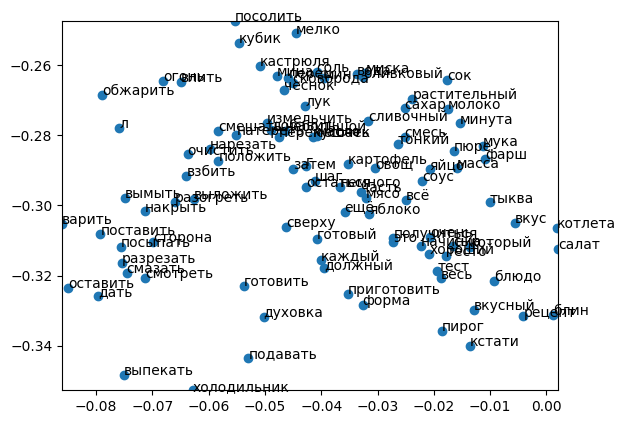

<Figure size 2000x480 with 0 Axes>

In [ ]:
def display_top_words_tsnescatterplot(model, top_words_vec, top_words):

    tsne = TSNE(n_components=2, random_state=0, perplexity=top_words_vec.shape[0] - 1)
    np.set_printoptions(suppress=True)


    Y = tsne.fit_transform(top_words_vec)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(top_words, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)

    plt.figure().set_figwidth(20)
    plt.show()


display_top_words_tsnescatterplot(model, top_words_vec, top_words)

In [ ]:
unique_words = set()

for i, words in enumerate(texts):
    unique_words.update(set(words))

unique_words, len(unique_words)

({'орлинкова',
  'яблок',
  'вермутлук',
  'создавать',
  'убеждённый',
  'ностальгический',
  'талант',
  'выполнять',
  'середине',
  'срезать',
  'повидло',
  'фритюрница',
  'укропасоль',
  'клецки',
  'образовывать',
  'небанановый',
  'сократится',
  'закисли',
  'количества',
  'тьана',
  'уравновешивать',
  'поднимается',
  'неравнодушны',
  'разнообразия',
  'взбалтывать',
  'слоя',
  'охлаждённым',
  'отваренный',
  'банница',
  'кхёкнуть',
  'гурманов',
  'обрезка',
  'страшны',
  'чистый',
  'накрывайте',
  'тайный',
  'альметта',
  'отделить',
  'запанировать',
  'баккарди',
  'высокий',
  'делаю',
  'шахта',
  'проводы',
  'минералами',
  'мясагрудка',
  'тесно',
  'черногочерный',
  'общепризнанный',
  'скруп',
  'мандаринов',
  'контрастировать',
  'завзятый',
  'земляника',
  'печенья',
  'карамель',
  'яркозеленым',
  'медлить',
  'салон',
  'хрустящее',
  'сесиль',
  'килограмм',
  'хотитеть',
  'попрежний',
  'чудоорех',
  'желтковтакж',
  'намазываться',
  'работаю

In [ ]:
word_dict = pd.DataFrame(columns=['word', 'vec'])

for i, word in enumerate(unique_words):
    try:
        word_dict.loc[i] = {'word': word, 'vec': model.wv.get_vector(word).tolist()}
    except:
        pass

word_dict

,word,vec
1,яблок,"[-0.04569875821471214, -0.036458808928728104, ..."
3,создавать,"[-0.18148478865623474, 0.4781203866004944, 0.0..."
4,убеждённый,"[-0.11402261257171631, 0.09018052369356155, -0..."
5,ностальгический,"[-0.11863616108894348, -0.034767333418130875, ..."
6,талант,"[-0.03544805943965912, 0.05736011266708374, 0...."
...,...,...
26411,манный,"[0.8810473084449768, 0.30184075236320496, 0.08..."
26413,судак,"[-0.1640385538339615, 0.489367812871933, -0.21..."
26414,воздушным,"[-0.1351548284292221, -6.290379678830504e-05, ..."
26415,редко,"[-0.3072168529033661, -0.03446440398693085, 0...."


In [ ]:
word_dict.to_csv('word_vec_dict.csv')

In [ ]:
kmeans_w2v = KMeans(n_clusters=2000, n_init = 1, init='k-means++', random_state=42)
kmeans_w2v.fit(word_dict['vec'].tolist())

KMeans(n_clusters=2000, n_init=1, random_state=42)

In [ ]:
kmeans_w2v.inertia_

5740.774340309801

In [ ]:
pred = kmeans_w2v.predict(word_dict['vec'].tolist())

In [ ]:
word_dict['class']=pred

In [ ]:
word_dict[word_dict['class']==3]

,word,vec,class
3782,перелить,"[0.6868493556976318, -0.305247962474823, 0.593...",3
